In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional

In [2]:
def cal_reflection_coefficient(z2:complex, z1:complex) -> complex:
    return (z2 - z1) / (z2 + z1)
def cal_impedance(gamma:complex, z1:complex = 1.0+0.0j) -> complex:
    return z1 * (1 + gamma) / (1 - gamma)
def cal_V_plus_and_minus(V0:complex, L:np.ndarray, wv:float, gamma0:complex) -> np.ndarray:
    V_plus = V0 * np.exp(-1j * 2 * np.pi * L / wv)
    V_minus = gamma0 * V0 * np.exp(1j * 2 * np.pi * L / wv)
    return V_plus, V_minus
def plot_voltage(V_plus:np.ndarray, V_minus:np.ndarray, L:np.ndarray, ax:Optional[plt.Axes]) -> None:
    if ax is None:
        _, ax = plt.subplots()
    ax.plot(L, np.real(V_plus), label=r'$V^+$')
    ax.plot(L, np.real(V_minus), label=r'$V^-$')
    ax.plot(L, np.real(V_plus + V_minus), 'k', label=r'$V=V^+ + V^-$')
    ax.grid(axis='y')
    ax.legend()
    ax.set_title('Voltage (V)')
    ax.set_ylabel('Voltage (V)')
    ax.set_xlabel('Length (m)')
def plot_reflection_coefficient(gamma_x:np.ndarray, L:np.ndarray, ax:Optional[plt.Axes]) -> None:
    if ax is None:
         _, ax = plt.subplots()
    ax1 = ax.twinx()
    ax.plot(L, np.abs(gamma_x), label=r'$\Gamma_{real}$')
    ax1.plot(L, np.angle(gamma_x, deg=True), 'black', label=r'$\angle \Gamma (^o)$' )
    ax.grid(axis='y')
    ax.set_title('Reflection Coefficient')
    ax.set_ylabel(r'$|\Gamma|$')
    ax1.set_ylabel(r'$\angle \Gamma (^o)$')
    ax.set_xlabel('Length (m)')
def plot_impedance(Z:np.ndarray, L:np.ndarray, ax:Optional[plt.Axes]) -> None:
    if ax is None:
        _, ax = plt.subplots()
    ax.plot(L, np.real(Z), label=r'$Re(Z)$')
    ax.plot(L, np.imag(Z), label=r'$Imag(Z)$')
    ax.grid(axis='y')
    ax.set_yscale('log')
    ax.legend()
    ax.set_title('Impedance')
def plot_impedance_phase(Z:np.ndarray, L:np.ndarray, ax:Optional[plt.Axes]) -> None:
    if ax is None:
        _, ax = plt.subplots()
    ax3 = ax.twinx()
    ax.plot(L, np.abs(Z), label=r'$|Z|$')
    ax3.plot(L, np.angle(Z, deg=True), 'black', label=r'$\angle Z$' )
    ax.grid(axis='y')
    ax.set_yscale('log')
    ax.legend()
    ax.set_title('Impedance')
    ax.set_ylabel(r'$|Z|$')
    ax3.set_ylabel(r'$\angle Z (^o)$')
def plot_current(I_plus:np.ndarray, I_minus:np.ndarray, L:np.ndarray, ax:Optional[plt.Axes]) -> None:
    if ax is None:
        _, ax = plt.subplots()
    ax.plot(L, np.real(I_plus), label=r'$I^+$')
    ax.plot(L, np.real(I_minus), label=r'$I^-$')
    ax.plot(L, np.real(I_plus + I_minus), 'k', label=r'$I=I^+ + I^-$')
    ax.grid(axis='y')
    ax.legend()
    ax.set_title('Current (A)')
    ax.set_ylabel('Current (A)')
    ax.set_xlabel('Length (m)')
def plot_power(P_plus:np.ndarray, P_minus:np.ndarray, P_total:np.ndarray, L:np.ndarray, ax:Optional[plt.Axes]) -> None:
    if ax is None:
        _, ax = plt.subplots()
    ax.plot(L, np.real(P_plus), label=r'$P^+$')
    ax.plot(L, np.real(P_minus), label=r'$P^-$')
    ax.plot(L, P_total, 'k', label=r'$P_{total}$')
    ax.grid(axis='y')
    ax.legend()
    ax.set_title('Power (W)')
    ax.set_ylabel('Power (W)')
    ax.set_xlabel('Length (m)')


In [3]:
""" setting """
# wavelength
wv = 1.0

# voltage
V0 = 1.0 + 0.0j

# x-axis
L = np.linspace(-5, 0, 1000)

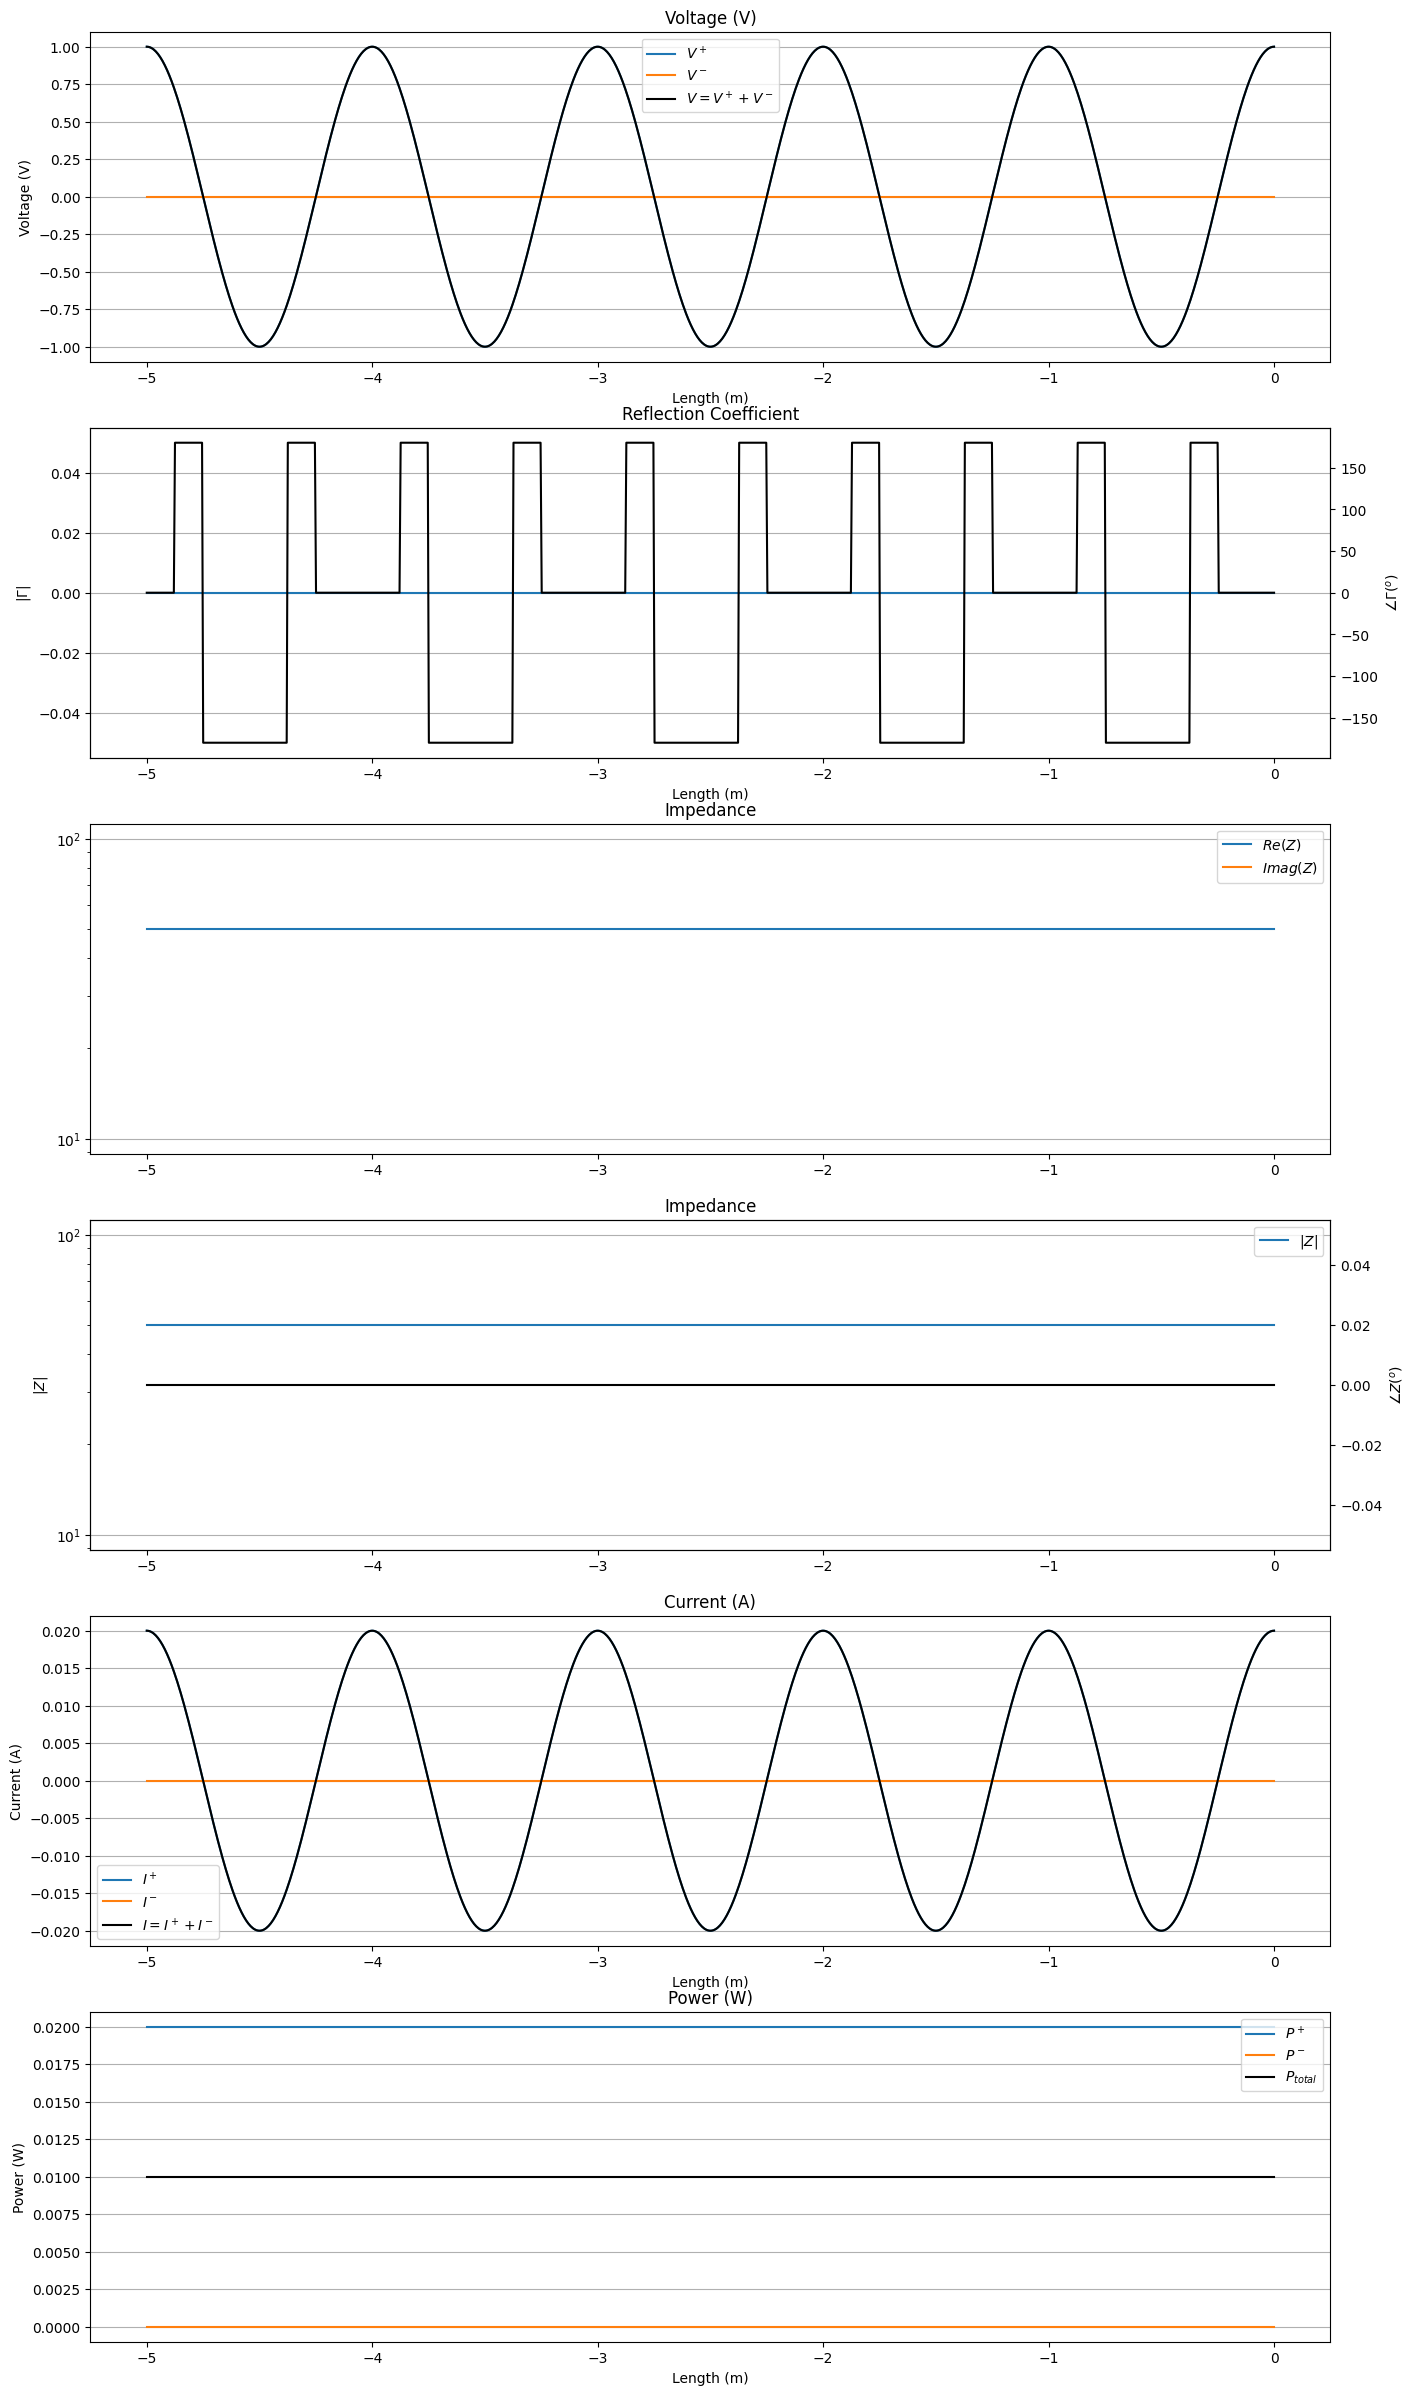

In [4]:
""" impedance matching """
# load impedance
ZL = 50 + 0.0j

# transmission line impedance
Z1 = 50

# reflection coefficient
r = cal_reflection_coefficient(ZL, Z1)

# voltage
V_plus, V_minus = cal_V_plus_and_minus(V0, L, wv, r)

# reflection coefficient at x
gamma_x = V_minus / V_plus

# impedance at x
z = cal_impedance(gamma_x, Z1)

# current
I_plus, I_minus = V_plus / z, -V_minus / z

# power
P_plus, P_minus = V_plus.conj() * I_plus, V_minus.conj() * I_minus
P_total = 0.5*np.real(P_plus + P_minus)

# plot
fig, ax = plt.subplots(6, 1, figsize=(16, 30))
plot_voltage(V_plus, V_minus, L, ax[0])
plot_reflection_coefficient(gamma_x, L, ax[1])
plot_impedance(z, L, ax[2])
plot_impedance_phase(z, L, ax[3])
plot_current(I_plus, I_minus, L, ax[4])
plot_power(P_plus, P_minus, P_total, L, ax[5])

C:\Users\User\AppData\Local\Temp\ipykernel_15752\3782709186.py:21: RuntimeWarning: divide by zero encountered in divide
  I_plus, I_minus = V_plus / z, -V_minus / z
C:\Users\User\AppData\Local\Temp\ipykernel_15752\3782709186.py:21: RuntimeWarning: invalid value encountered in divide
  I_plus, I_minus = V_plus / z, -V_minus / z
C:\Users\User\AppData\Local\Temp\ipykernel_15752\3782709186.py:24: RuntimeWarning: invalid value encountered in multiply
  P_plus, P_minus = V_plus.conj() * I_plus, V_minus.conj() * I_minus


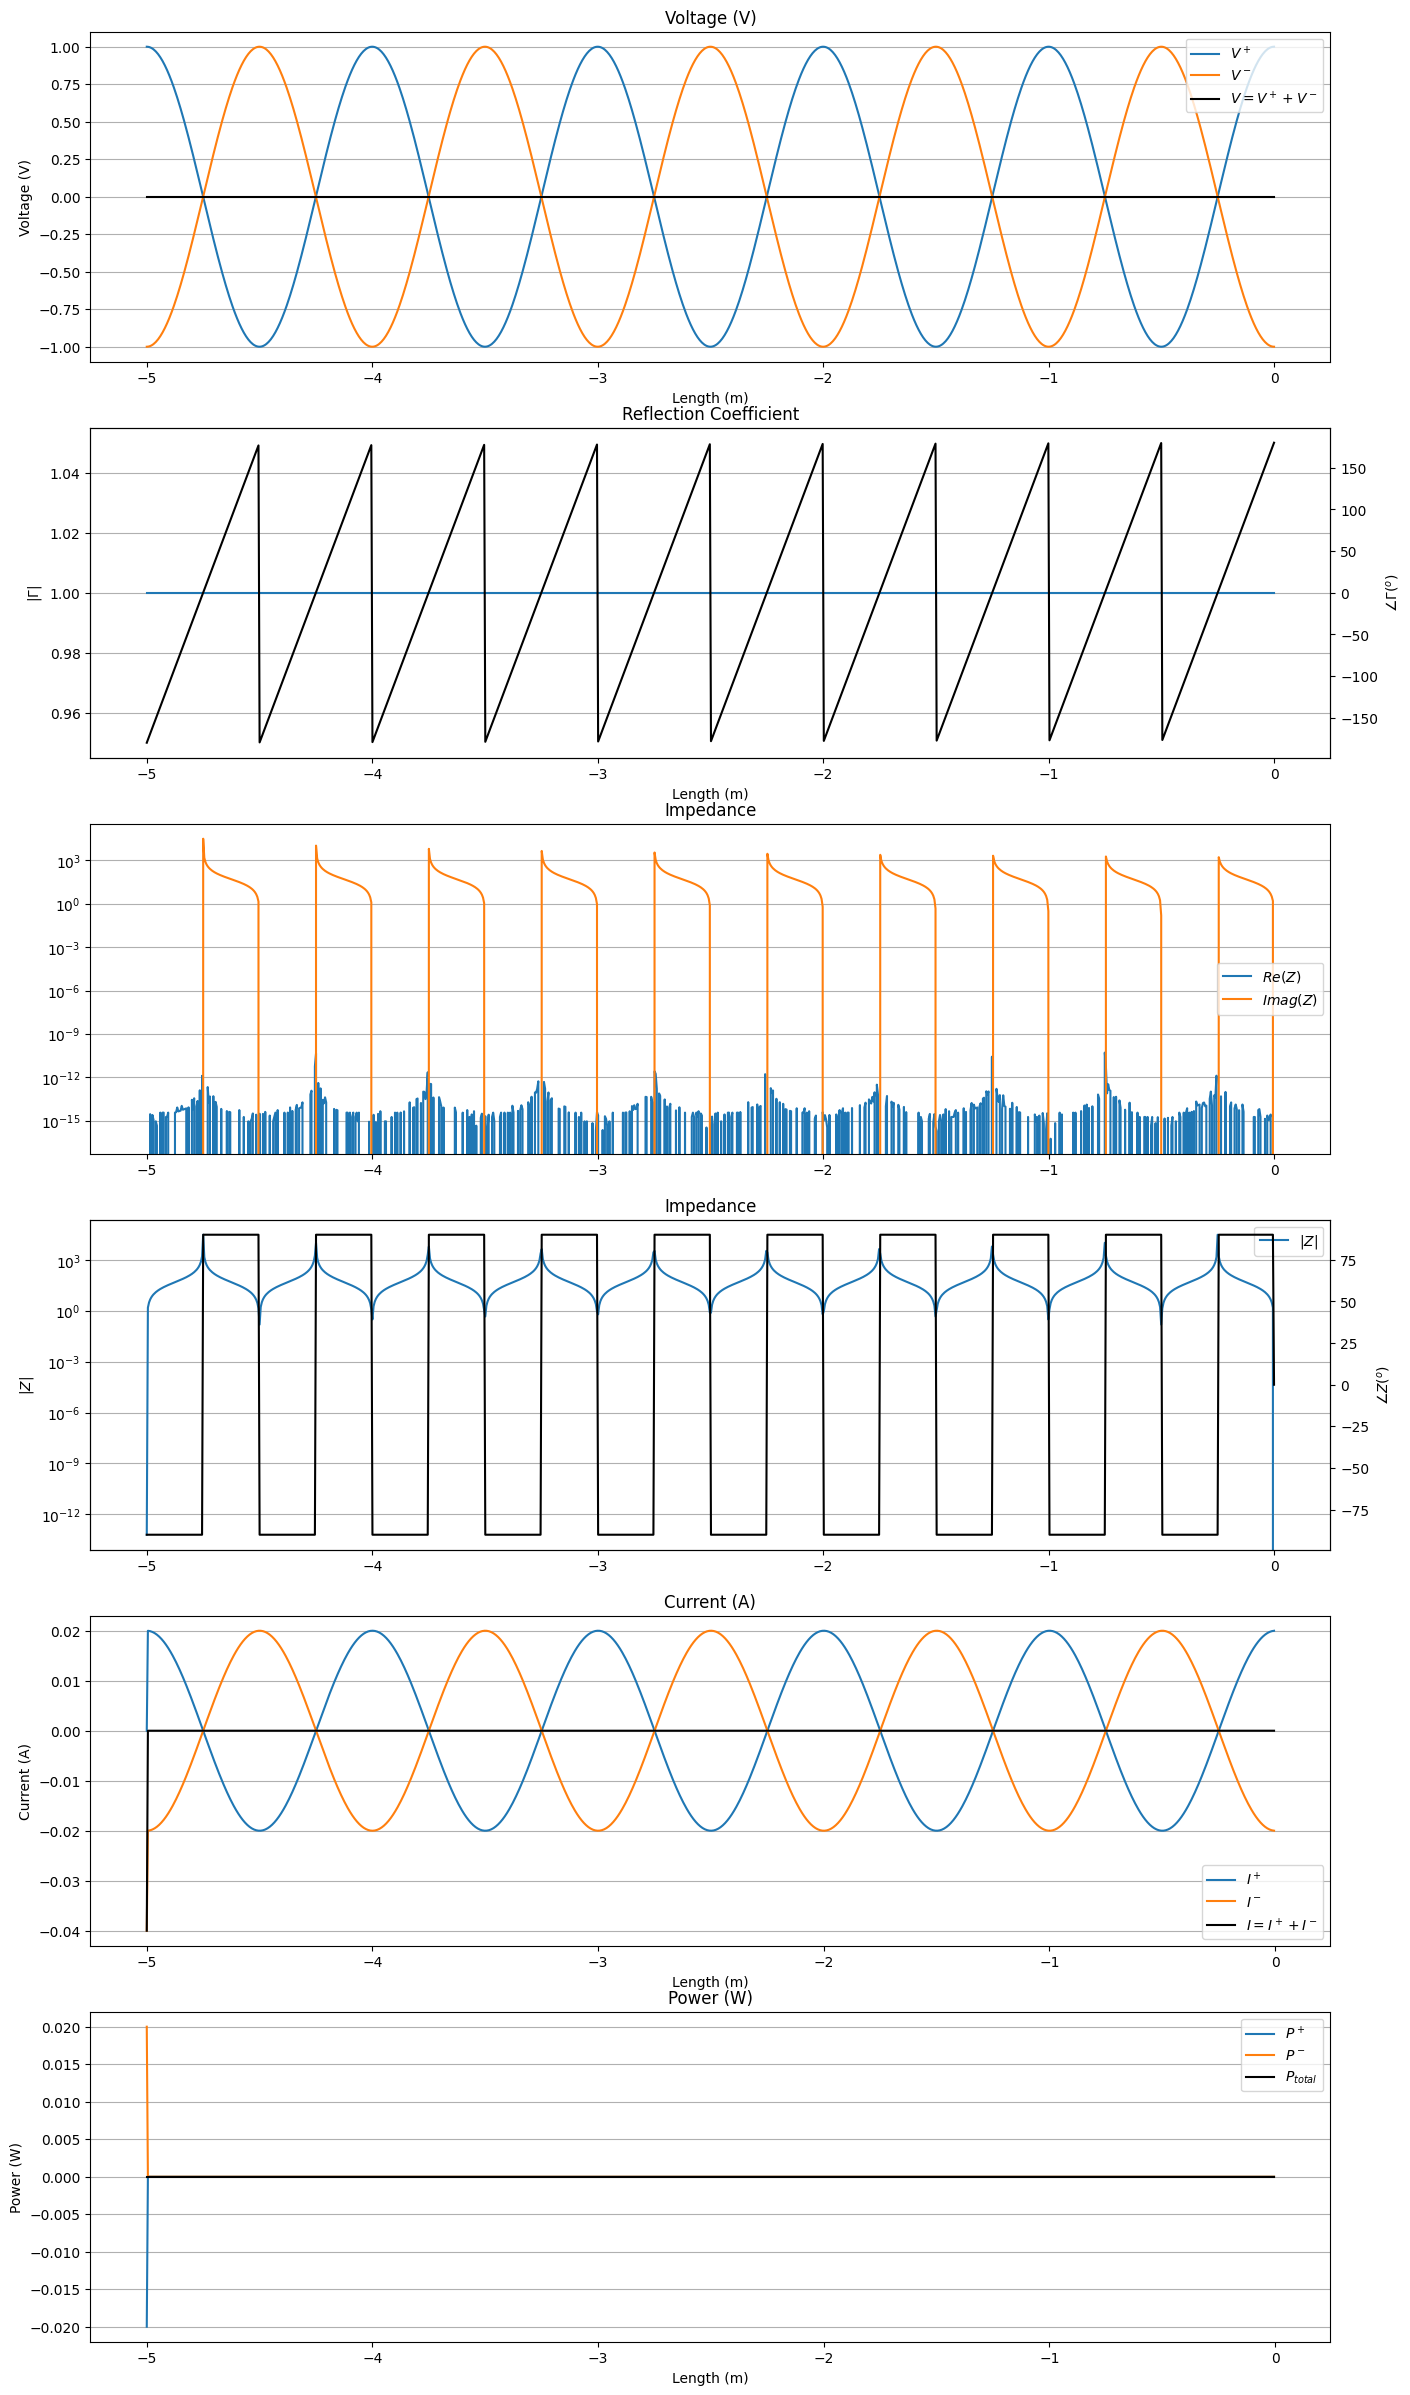

In [5]:
""" short circuit """
# load impedance
ZL = 0 + 0.0j

# transmission line impedance
Z1 = 50

# reflection coefficient
r = cal_reflection_coefficient(ZL, Z1)

# voltage
V_plus, V_minus = cal_V_plus_and_minus(V0, L, wv, r)

# reflection coefficient at x
gamma_x = V_minus / V_plus

# impedance at x
z = cal_impedance(gamma_x, Z1)

# current
I_plus, I_minus = V_plus / z, -V_minus / z

# power
P_plus, P_minus = V_plus.conj() * I_plus, V_minus.conj() * I_minus
P_total = 0.5*np.real(P_plus + P_minus)

# plot
fig, ax = plt.subplots(6, 1, figsize=(16, 30))
plot_voltage(V_plus, V_minus, L, ax[0])
plot_reflection_coefficient(gamma_x, L, ax[1])
plot_impedance(z, L, ax[2])
plot_impedance_phase(z, L, ax[3])
plot_current(I_plus, I_minus, L, ax[4])
plot_power(P_plus, P_minus, P_total, L, ax[5])



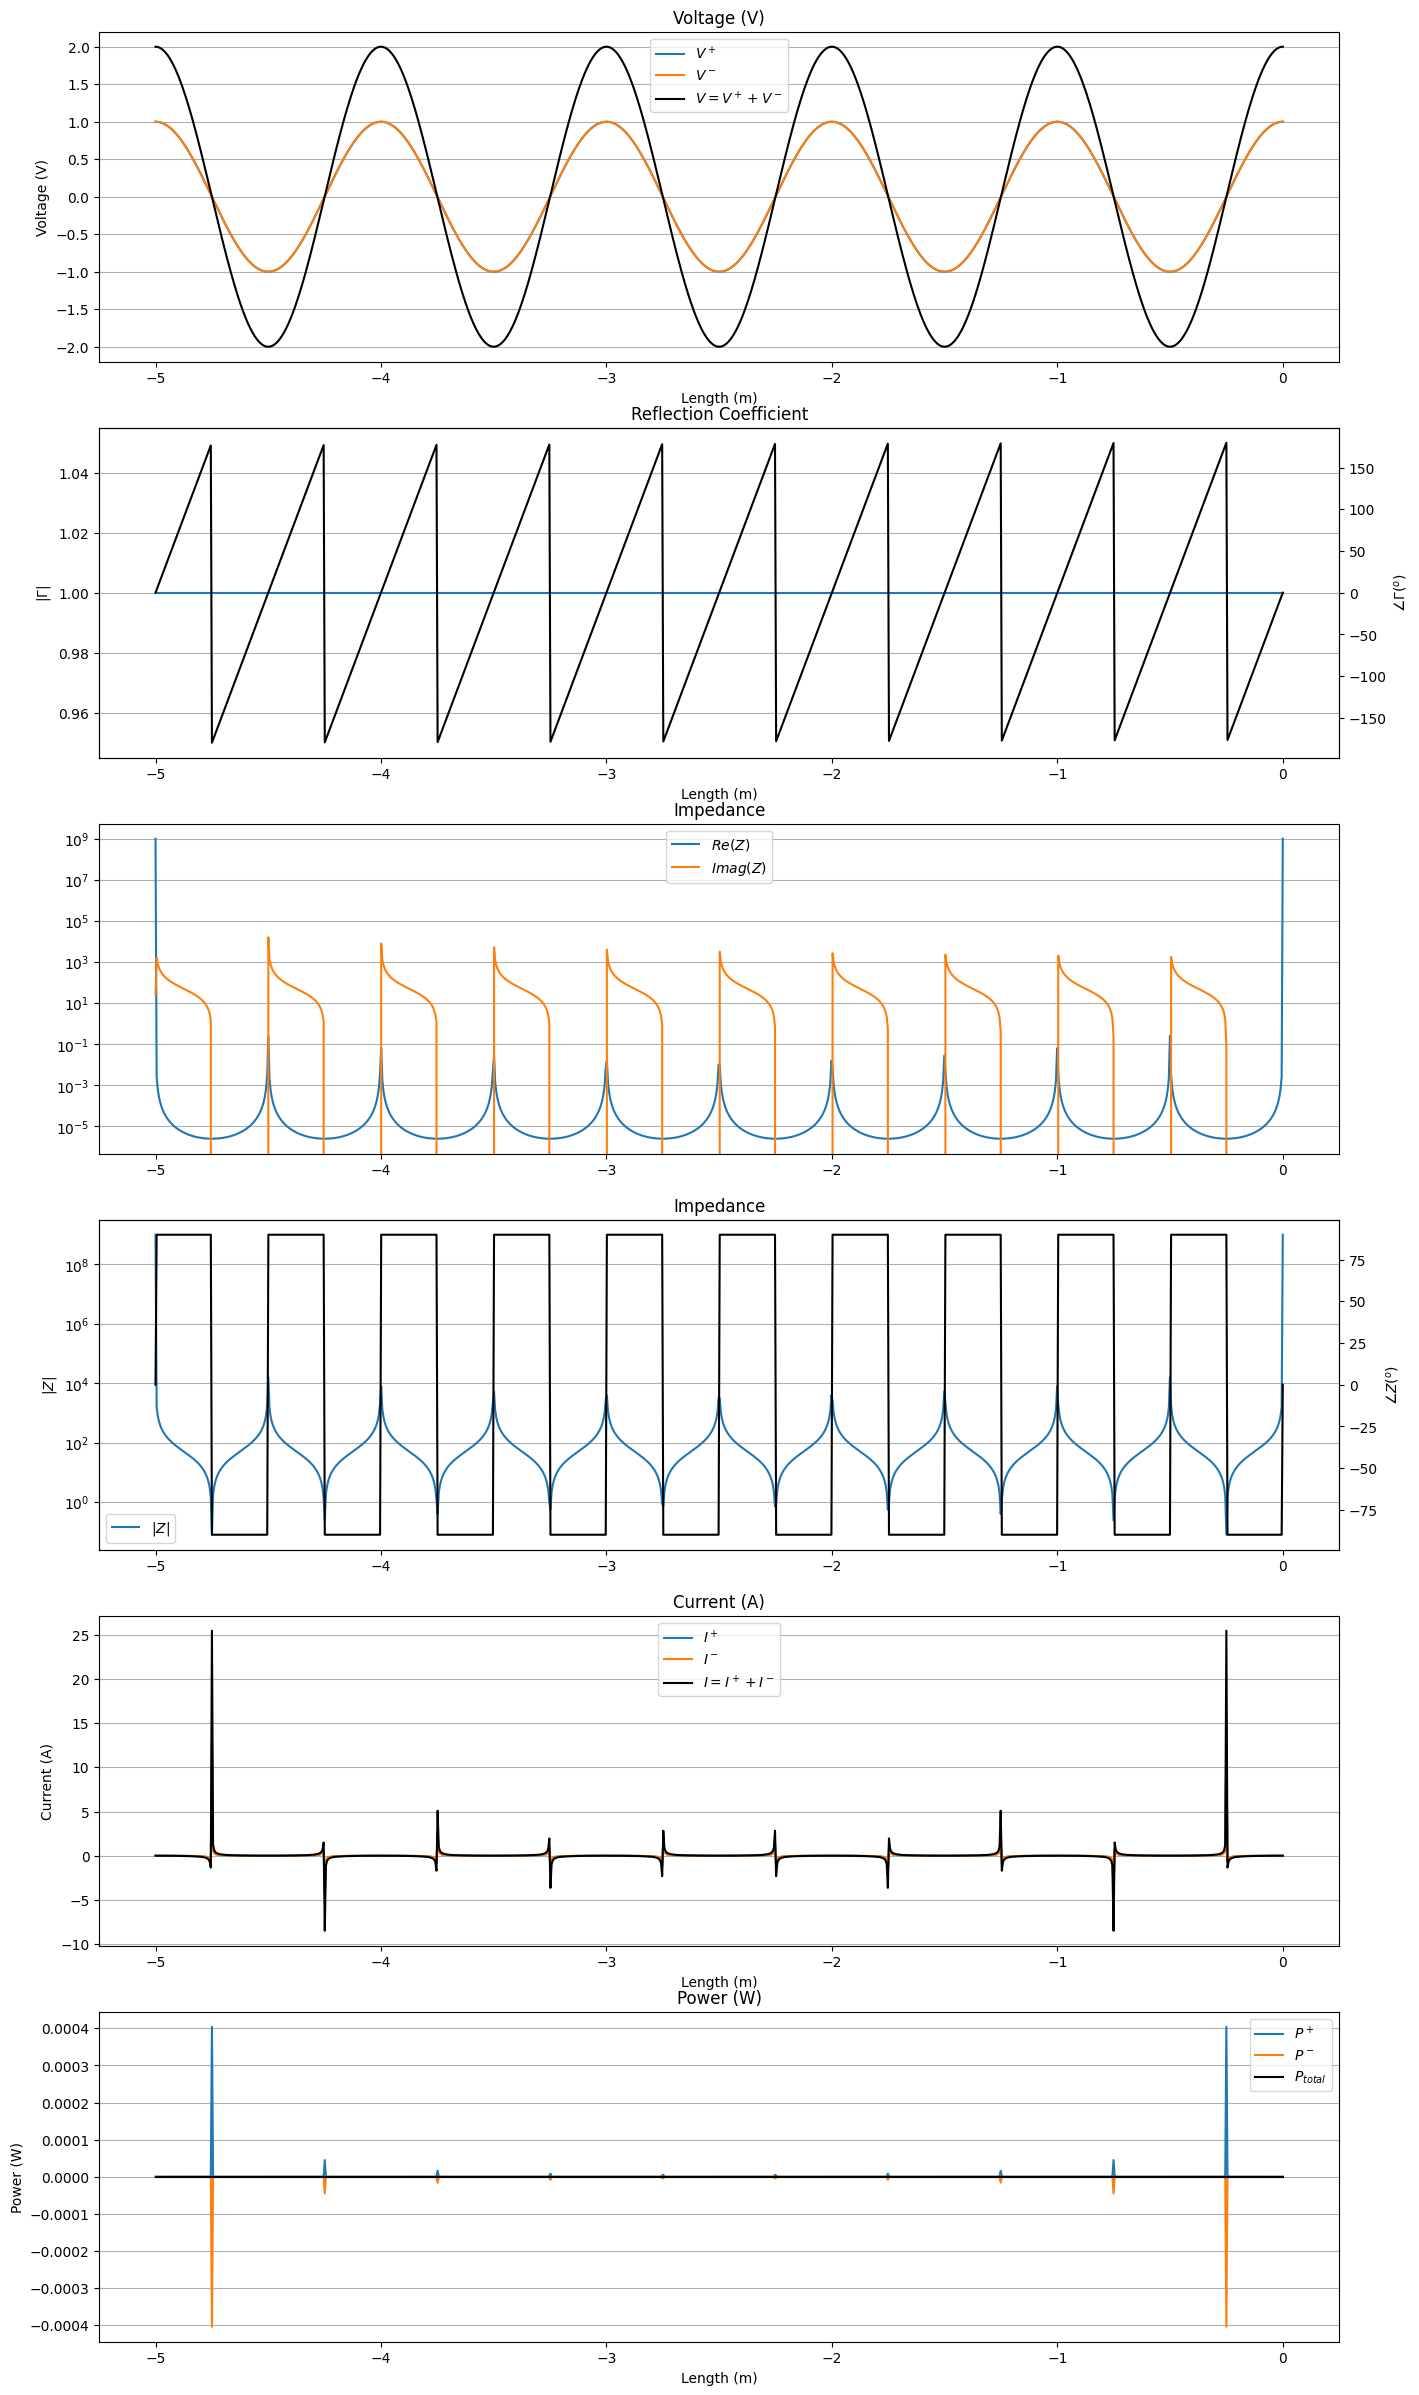

In [14]:
""" open circuit """
# open impedance
ZL = 1_000_000_000

# transmission line impedance
Z1 = 50

# reflection coefficient
r = cal_reflection_coefficient(ZL, Z1)

# voltage
V_plus, V_minus = cal_V_plus_and_minus(V0, L, wv, r)

# reflection coefficient at x
gamma_x = V_minus / V_plus

# impedance at x
z = cal_impedance(gamma_x, Z1)

# current
I_plus, I_minus = V_plus / z, -V_minus / z

# power
P_plus, P_minus = V_plus.conj() * I_plus, V_minus.conj() * I_minus
P_total = 0.5*np.real(P_plus + P_minus)

# plot
fig, ax = plt.subplots(6, 1, figsize=(16, 30))
plot_voltage(V_plus, V_minus, L, ax[0])
plot_reflection_coefficient(gamma_x, L, ax[1])
plot_impedance(z, L, ax[2])
plot_impedance_phase(z, L, ax[3])
plot_current(I_plus, I_minus, L, ax[4])
plot_power(P_plus, P_minus, P_total, L, ax[5])

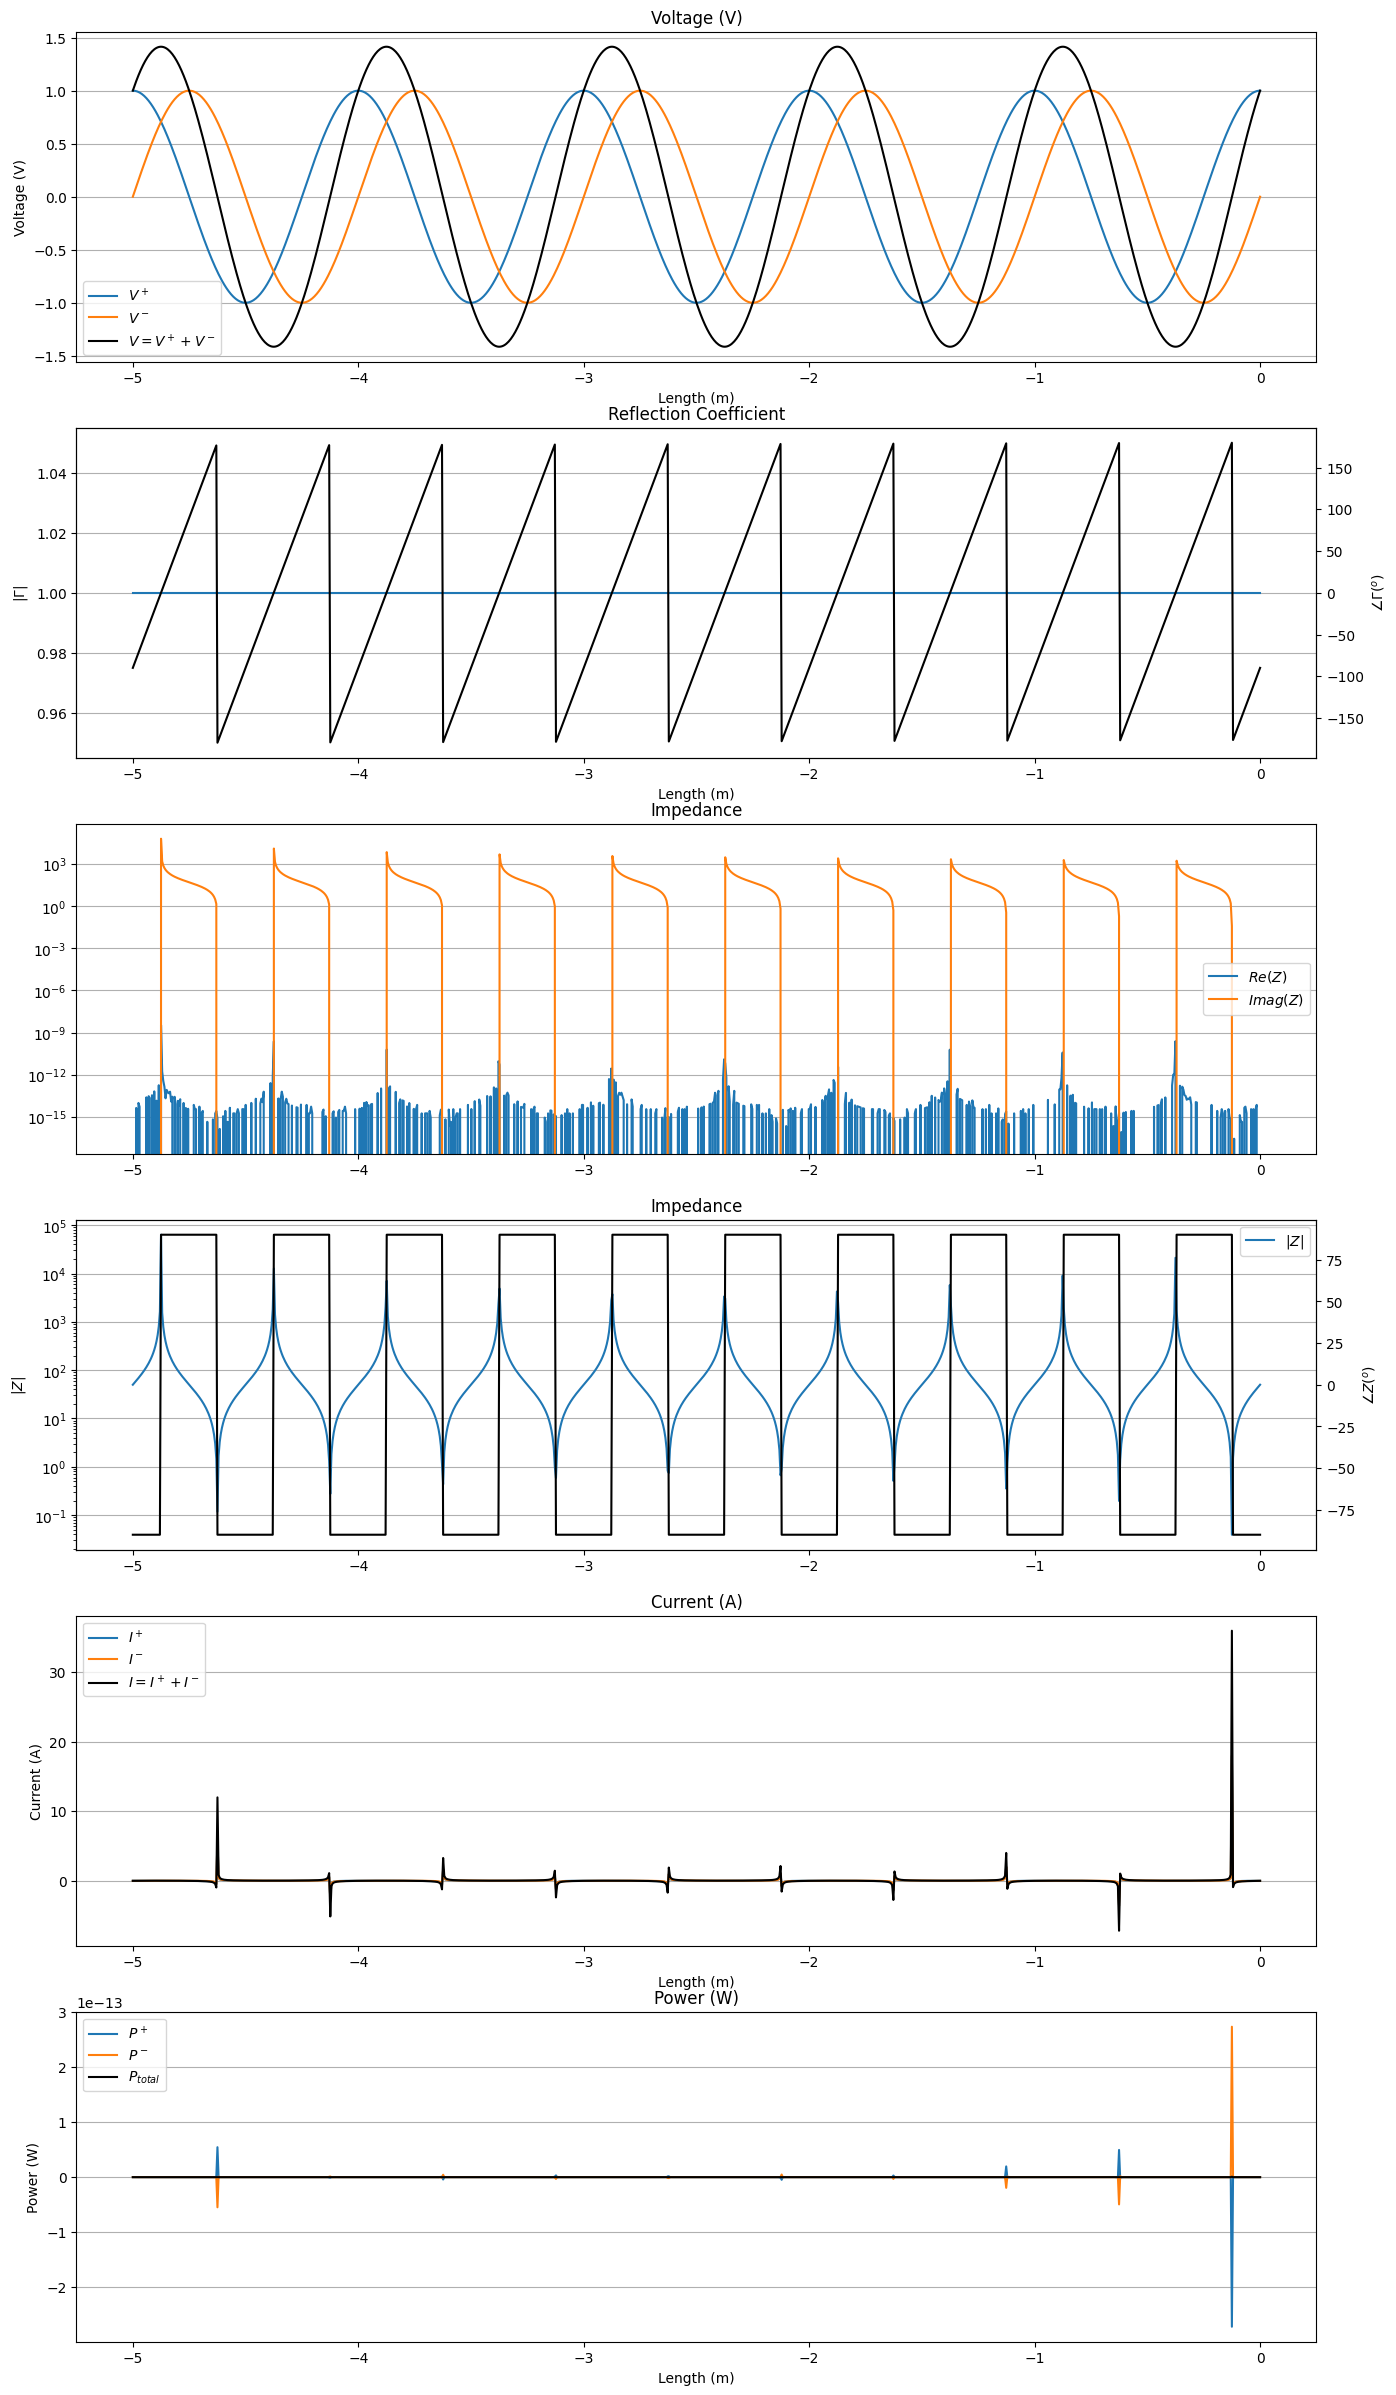

In [15]:
""" capacitor """
# open impedance
ZL = -50j

# transmission line impedance
Z1 = 50

# reflection coefficient
r = cal_reflection_coefficient(ZL, Z1)

# voltage
V_plus, V_minus = cal_V_plus_and_minus(V0, L, wv, r)

# reflection coefficient at x
gamma_x = V_minus / V_plus

# impedance at x
z = cal_impedance(gamma_x, Z1)

# current
I_plus, I_minus = V_plus / z, -V_minus / z

# power
P_plus, P_minus = V_plus.conj() * I_plus, V_minus.conj() * I_minus
P_total = 0.5*np.real(P_plus + P_minus)

# plot
fig, ax = plt.subplots(6, 1, figsize=(16, 30))
plot_voltage(V_plus, V_minus, L, ax[0])
plot_reflection_coefficient(gamma_x, L, ax[1])
plot_impedance(z, L, ax[2])
plot_impedance_phase(z, L, ax[3])
plot_current(I_plus, I_minus, L, ax[4])
plot_power(P_plus, P_minus, P_total, L, ax[5])



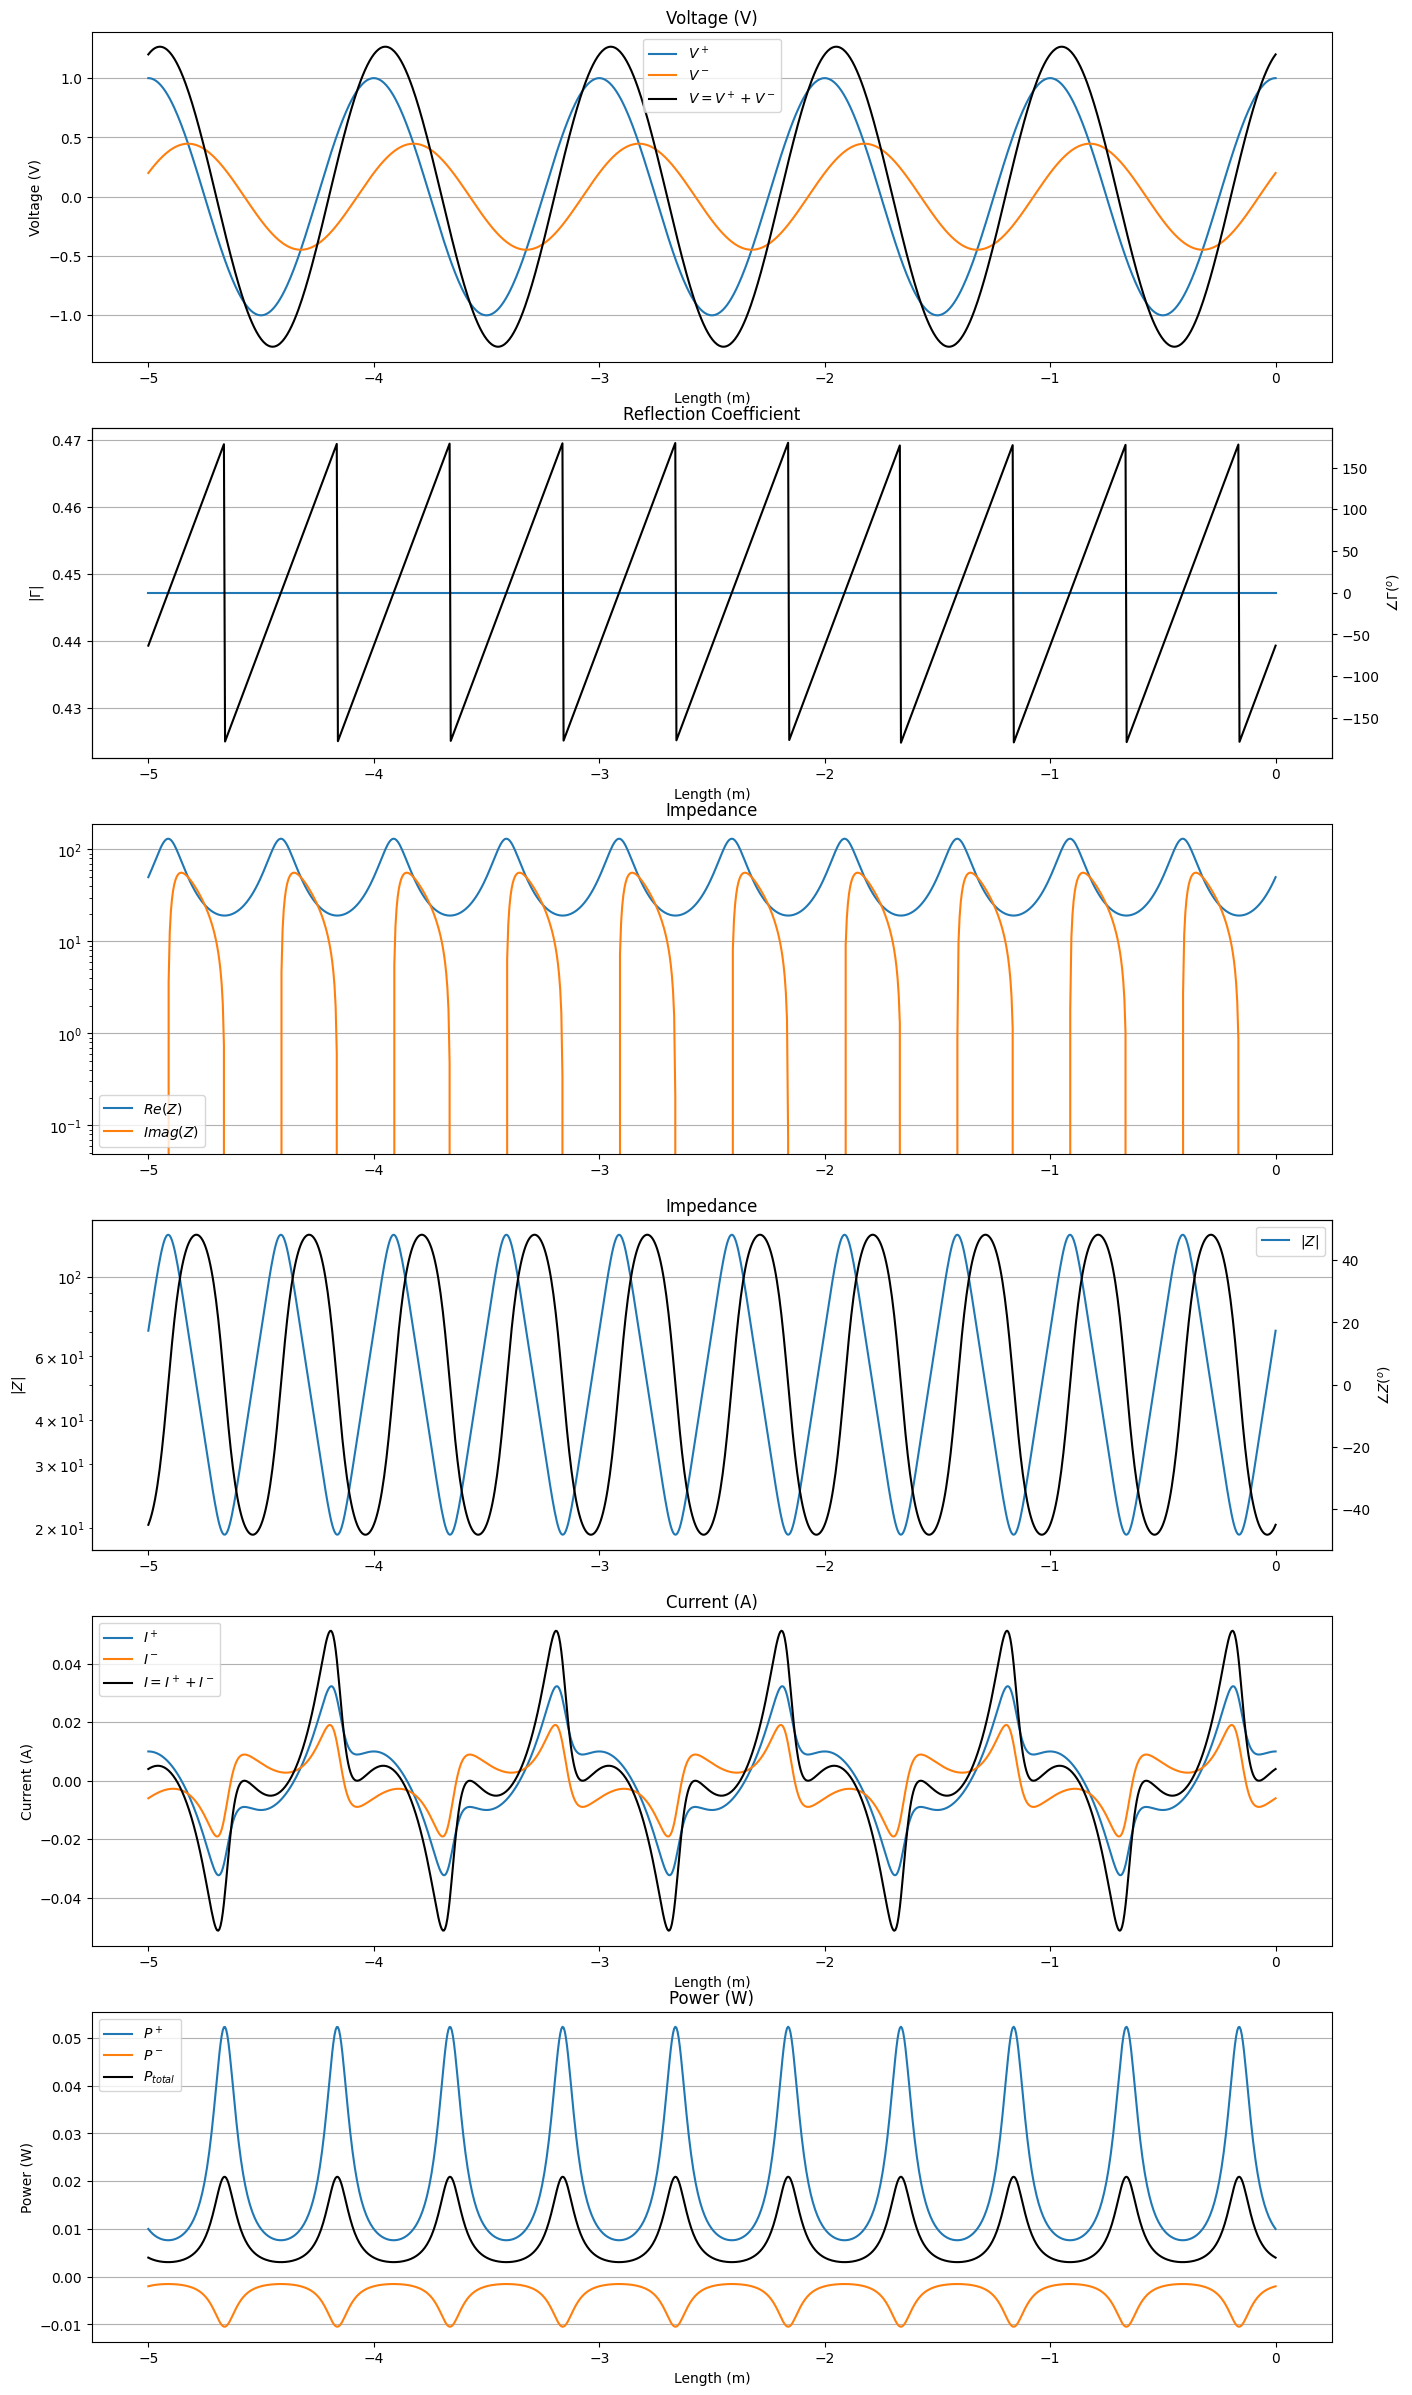

In [16]:
""" resistance + capacitor """
# open impedance
ZL = 50 - 50j

# transmission line impedance
Z1 = 50

# reflection coefficient
r = cal_reflection_coefficient(ZL, Z1)

# voltage
V_plus, V_minus = cal_V_plus_and_minus(V0, L, wv, r)

# reflection coefficient at x
gamma_x = V_minus / V_plus

# impedance at x
z = cal_impedance(gamma_x, Z1)

# current
I_plus, I_minus = V_plus / z, -V_minus / z

# power
P_plus, P_minus = V_plus.conj() * I_plus, V_minus.conj() * I_minus
P_total = 0.5*np.real(P_plus + P_minus)

# plot
fig, ax = plt.subplots(6, 1, figsize=(16, 30))
plot_voltage(V_plus, V_minus, L, ax[0])
plot_reflection_coefficient(gamma_x, L, ax[1])
plot_impedance(z, L, ax[2])
plot_impedance_phase(z, L, ax[3])
plot_current(I_plus, I_minus, L, ax[4])
plot_power(P_plus, P_minus, P_total, L, ax[5])